In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [35]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [36]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [37]:
train.shape

(8693, 14)

In [38]:
test.shape

(4277, 13)

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [40]:
train['Cabin'][train['Cabin'].isnull()]

15      NaN
93      NaN
103     NaN
222     NaN
227     NaN
       ... 
8209    NaN
8475    NaN
8485    NaN
8509    NaN
8656    NaN
Name: Cabin, Length: 199, dtype: object

In [41]:
train['Cabin']

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 8693, dtype: object

In [42]:
train['Cabin'][0]

'B/0/P'

In [43]:
train['CabinDeck'] = train['Cabin'].apply(lambda x: x.split('/')[0] if isinstance(x, str) else x)
test['CabinDeck'] = train['Cabin'].apply(lambda x: x.split('/')[0] if isinstance(x, str) else x)

In [44]:
train['CabinNum'] = train['Cabin'].apply(lambda x: int(x.split('/')[1]) if isinstance(x, str) else x)
test['CabinNum'] = train['Cabin'].apply(lambda x: int(x.split('/')[1]) if isinstance(x, str) else x)

In [45]:
train['CabinSide'] = train['Cabin'].apply(lambda x: x.split('/')[-1] if isinstance(x, str) else x)
test['CabinSide'] = train['Cabin'].apply(lambda x: x.split('/')[-1] if isinstance(x, str) else x)

In [46]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabinDeck,CabinNum,CabinSide
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0.0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0.0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0.0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0.0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1.0,S


In [47]:
train['CabinNum'].value_counts()

CabinNum
82.0      28
86.0      22
19.0      22
56.0      21
176.0     21
          ..
1644.0     1
1515.0     1
1639.0     1
1277.0     1
1894.0     1
Name: count, Length: 1817, dtype: int64

In [48]:
train['CabinSide'].value_counts()

CabinSide
S    4288
P    4206
Name: count, dtype: int64

In [49]:
train['CabinDeck'].value_counts()

CabinDeck
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64

In [50]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,CabinDeck,CabinNum,CabinSide
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,B,0.0,P
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,0.0,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,A,0.0,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,A,0.0,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,1.0,S


In [51]:
train[['CabinSide', 'Transported']].groupby('CabinSide').mean()

,Transported
CabinSide,
P,0.451260
S,0.555037


In [54]:
train[['CabinDeck', 'Transported']].groupby('CabinDeck').mean()

,Transported
CabinDeck,
A,0.496094
B,0.734275
C,0.680054
D,0.433054
E,0.357306
F,0.439871
G,0.516217
T,0.200000


In [8]:
train['Bill'] = train['RoomService'] + train['FoodCourt'] + train['ShoppingMall'] + train['Spa'] + train['VRDeck']
test['Bill'] = test['RoomService'] + test['FoodCourt'] + test['ShoppingMall'] + test['Spa'] + test['VRDeck']

In [344]:
train.drop(columns=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], inplace=True)
test.drop(columns=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], inplace=True)

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  CabinDeck     8494 non-null   object 
 15  CabinNum      8494 non-null   float64
 16  CabinSide     8494 non-null   object 
dtypes: bool(1), float64(7), object(9)
memory usage: 1.1+ MB


In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
 13  CabinDeck     4164 non-null   object 
 14  CabinNum      4164 non-null   float64
 15  CabinSide     4164 non-null   object 
dtypes: float64(7), object(9)
memory usage: 534.8+ KB


In [57]:
train.isnull().mean()*100

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
CabinDeck       2.289198
CabinNum        2.289198
CabinSide       2.289198
dtype: float64

In [58]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinNum
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8494.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,600.367671
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,511.867226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,167.250000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,427.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,999.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1894.000000


In [59]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinNum
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000,4164.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031,292.707973
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742,250.620934
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,85.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,199.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000,493.250000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000,937.000000


In [60]:
train.duplicated().sum()

0

In [61]:
train.drop_duplicates(inplace=True)

In [62]:
train.duplicated().sum()

0

In [63]:
test.duplicated().sum()

0

In [64]:
test.drop_duplicates(inplace=True)

In [65]:
test.duplicated().sum()

0

In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  CabinDeck     8494 non-null   object 
 15  CabinNum      8494 non-null   float64
 16  CabinSide     8494 non-null   object 
dtypes: bool(1), float64(7), object(9)
memory usage: 1.1+ MB


In [67]:
train.shape

(8693, 17)

In [68]:
test.shape

(4277, 16)

In [69]:
train.drop(columns=['PassengerId', 'Name', 'Cabin'], inplace=True)
test.drop(columns=['Name', 'Cabin'], inplace=True)

In [70]:
Pid = test['PassengerId']
test.drop(columns=['PassengerId'])

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinDeck,CabinNum,CabinSide
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,B,0.0,P
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,0.0,S
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,A,0.0,S
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,A,0.0,S
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,1.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,E,298.0,S
4273,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,F,853.0,S
4274,Mars,True,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,F,937.0,P
4275,Europa,False,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,C,143.0,P


In [71]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Transported'] = le.fit_transform(train['Transported'])

In [72]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinDeck,CabinNum,CabinSide
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0,B,0.0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1,F,0.0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,A,0.0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,A,0.0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1,F,1.0,S


In [363]:
#train[['Age', 'Bill', 'Transported']].corr()['Transported']

Age           -0.075026
Bill          -0.197671
Transported    1.000000
Name: Transported, dtype: float64

In [73]:
train[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CabinNum', 'Transported']].corr()['Transported']

Age            -0.075026
RoomService    -0.244611
FoodCourt       0.046566
ShoppingMall    0.010141
Spa            -0.221131
VRDeck         -0.207075
CabinNum       -0.045097
Transported     1.000000
Name: Transported, dtype: float64

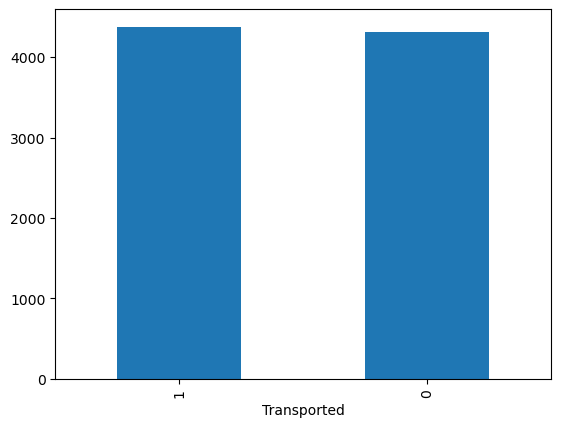

In [74]:
train['Transported'].value_counts().plot(kind='bar')
plt.show()

In [75]:
train.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
CabinDeck       199
CabinNum        199
CabinSide       199
dtype: int64

In [76]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
CabinDeck       113
CabinNum        113
CabinSide       113
dtype: int64

C:\Users\SHREYA\anaconda3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

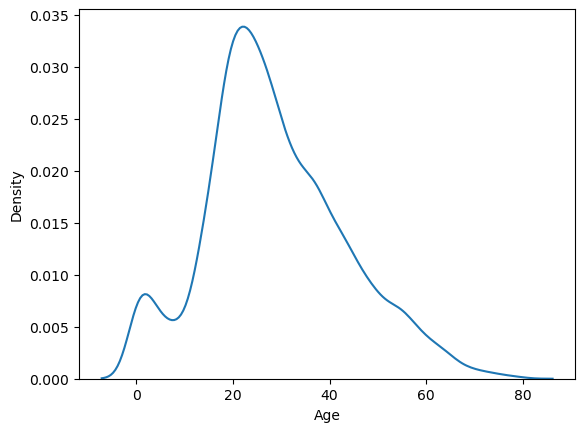

In [77]:
sns.kdeplot(train['Age'])

In [78]:
train_age = np.random.randint(train['Age'].mean()-train['Age'].std(), train['Age'].mean()+train['Age'].std(), size=179)

In [79]:
train_age

array([36, 42, 30, 40, 29, 34, 29, 32, 36, 24, 30, 23, 19, 17, 38, 31, 37,
       32, 22, 20, 34, 31, 35, 17, 33, 42, 14, 25, 34, 23, 41, 19, 24, 18,
       32, 17, 40, 40, 30, 39, 31, 34, 36, 24, 26, 20, 20, 14, 35, 32, 27,
       36, 36, 23, 18, 20, 15, 24, 27, 23, 17, 23, 14, 39, 31, 18, 32, 28,
       20, 28, 39, 31, 37, 25, 35, 26, 20, 25, 31, 26, 17, 22, 19, 34, 16,
       19, 34, 26, 31, 31, 34, 15, 17, 19, 18, 39, 20, 25, 16, 29, 19, 14,
       33, 20, 31, 29, 25, 19, 27, 30, 42, 26, 16, 30, 20, 29, 15, 30, 36,
       14, 32, 14, 17, 18, 39, 29, 42, 31, 28, 34, 18, 33, 21, 40, 20, 23,
       17, 38, 31, 25, 26, 19, 35, 19, 31, 34, 32, 19, 41, 22, 36, 19, 35,
       14, 15, 24, 35, 33, 30, 37, 27, 30, 42, 22, 31, 22, 25, 16, 28, 33,
       25, 34, 21, 42, 41, 22, 42, 27, 36])

In [80]:
train.loc[np.isnan(train['Age']), 'Age'] = train_age

C:\Users\SHREYA\anaconda3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

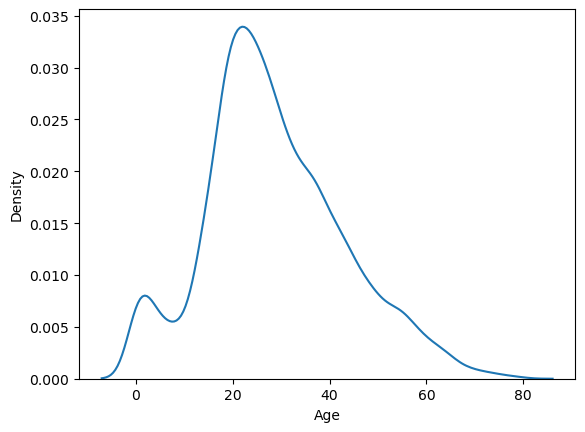

In [81]:
sns.kdeplot(train['Age'])

C:\Users\SHREYA\anaconda3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

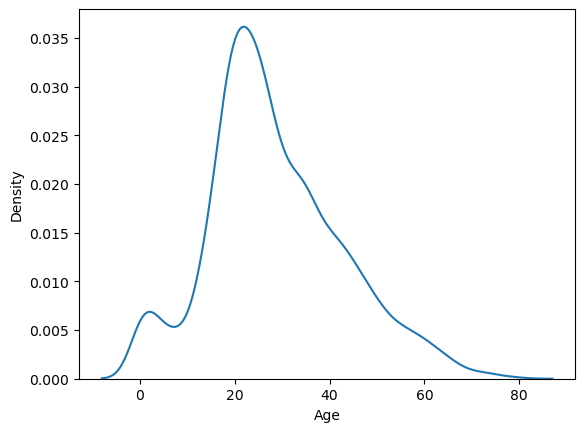

In [82]:
sns.kdeplot(test['Age'])

In [83]:
test['Age'].isnull().sum()

91

In [84]:
test_age = np.random.randint(test['Age'].mean()-test['Age'].std(), test['Age'].mean()+test['Age'].std(), size=91)

In [85]:
test_age

array([14, 21, 15, 14, 32, 26, 36, 16, 25, 18, 30, 39, 29, 28, 39, 35, 35,
       21, 17, 18, 21, 25, 30, 32, 21, 30, 26, 23, 33, 28, 30, 33, 25, 33,
       20, 28, 29, 27, 30, 22, 25, 19, 25, 31, 31, 36, 37, 16, 41, 17, 33,
       15, 30, 25, 15, 21, 14, 17, 19, 29, 25, 18, 28, 35, 37, 41, 33, 20,
       36, 27, 31, 23, 19, 33, 28, 19, 39, 34, 39, 35, 31, 23, 17, 15, 22,
       15, 37, 41, 28, 14, 14])

In [86]:
test.loc[np.isnan(test['Age']), 'Age']=test_age

C:\Users\SHREYA\anaconda3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

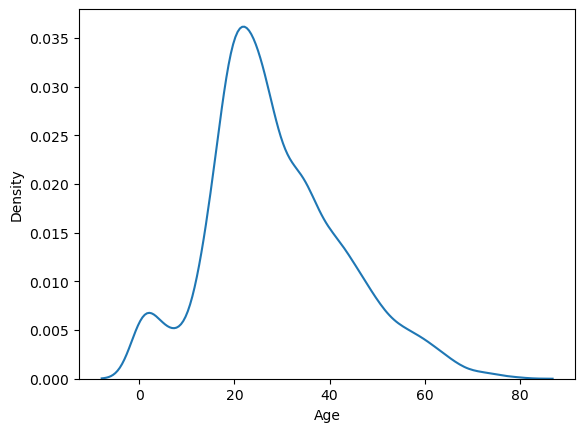

In [87]:
sns.kdeplot(test['Age'])

In [102]:
train.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age               0
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
CabinDeck       199
CabinNum        199
CabinSide       199
dtype: int64

In [104]:
train_room_service = np.random.randint(train['RoomService'].mean()-train['RoomService'].std(), train['RoomService'].mean()+train['RoomService'].std(), size=181)
train_food_court = np.random.randint(train['FoodCourt'].mean()-train['FoodCourt'].std(), train['FoodCourt'].mean()+train['FoodCourt'].std(), size=183)
train_shopping_mall = np.random.randint(train['ShoppingMall'].mean()-train['ShoppingMall'].std(), train['ShoppingMall'].mean()+train['ShoppingMall'].std(), size=208)
train_spa = np.random.randint(train['Spa'].mean()-train['Spa'].std(), train['Spa'].mean()+train['Spa'].std(), size=183)
train_vrdeck = np.random.randint(train['VRDeck'].mean()-train['VRDeck'].std(), train['VRDeck'].mean()+train['VRDeck'].std(), size=188)
train_cabin_num = np.random.randint(train['CabinNum'].mean()-train['CabinNum'].std(), train['CabinNum'].mean()+train['CabinNum'].std(), size=199)

In [105]:
train.loc[np.isnan(train['RoomService']), 'RoomService'] = train_room_service
train.loc[np.isnan(train['FoodCourt']), 'FoodCourt'] = train_food_court
train.loc[np.isnan(train['ShoppingMall']), 'ShoppingMall'] = train_shopping_mall
train.loc[np.isnan(train['Spa']), 'Spa'] = train_spa
train.loc[np.isnan(train['VRDeck']), 'VRDeck'] = train_vrdeck
train.loc[np.isnan(train['CabinNum']), 'CabinNum'] = train_cabin_num

In [109]:
train.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
CabinDeck       199
CabinNum          0
CabinSide       199
dtype: int64

In [106]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Destination      92
Age               0
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
CabinDeck       113
CabinNum        113
CabinSide       113
dtype: int64

In [107]:
test_room_service = np.random.randint(test['RoomService'].mean()-test['RoomService'].std(), test['RoomService'].mean()+test['RoomService'].std(), size=82)
test_food_court = np.random.randint(test['FoodCourt'].mean()-test['FoodCourt'].std(), test['FoodCourt'].mean()+test['FoodCourt'].std(), size=106)
test_shopping_mall = np.random.randint(test['ShoppingMall'].mean()-test['ShoppingMall'].std(), test['ShoppingMall'].mean()+test['ShoppingMall'].std(), size=98)
test_spa = np.random.randint(test['Spa'].mean()-test['Spa'].std(), test['Spa'].mean()+test['Spa'].std(), size=101)
test_vrdeck = np.random.randint(test['VRDeck'].mean()-test['VRDeck'].std(), test['VRDeck'].mean()+test['VRDeck'].std(), size=80)
test_cabin_num = np.random.randint(test['CabinNum'].mean()-test['CabinNum'].std(), test['CabinNum'].mean()+test['CabinNum'].std(), size=113)

In [108]:
test.loc[np.isnan(test['RoomService']), 'RoomService'] = test_room_service
test.loc[np.isnan(test['FoodCourt']), 'FoodCourt'] = test_food_court
test.loc[np.isnan(test['ShoppingMall']), 'ShoppingMall'] = test_shopping_mall
test.loc[np.isnan(test['Spa']), 'Spa'] = test_spa
test.loc[np.isnan(test['VRDeck']), 'VRDeck'] = test_vrdeck
test.loc[np.isnan(test['CabinNum']), 'CabinNum'] = test_cabin_num

In [110]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Destination      92
Age               0
VIP              93
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
CabinDeck       113
CabinNum          0
CabinSide       113
dtype: int64

In [90]:
#sns.kdeplot(train['Bill'])
#plt.show()

In [91]:
#train['Bill'].isnull().sum()

In [92]:
#train_bill = np.random.randint(train['Bill'].mean()-train['Bill'].std(), train['Bill'].mean()+train['Bill'].std(), size=908)

In [93]:
#train_bill

In [94]:
#train.loc[np.isnan(train['Bill']), 'Bill'] = train_bill

In [95]:
#sns.kdeplot(train['Bill'])
#plt.show()

In [96]:
#sns.kdeplot(test['Bill'])
#plt.show()

In [97]:
#test['Bill'].isnull().sum()

In [98]:
#test_bill = np.random.randint(test['Bill'].mean()-test['Bill'].std(), test['Bill'].mean()+test['Bill'].std(), size=455)

In [99]:
#test_bill

In [100]:
#test.loc[np.isnan(test['Bill']), 'Bill'] = test_bill

In [101]:
#sns.kdeplot(test['Bill'])
#plt.show()

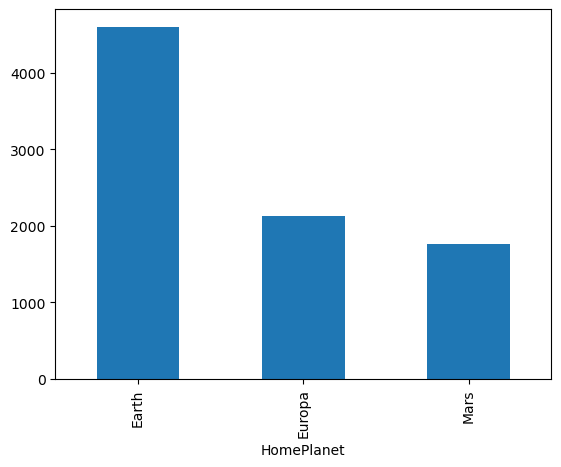

In [111]:
train['HomePlanet'].value_counts().plot(kind='bar')
plt.show()

In [112]:
train['HomePlanet'] = train['HomePlanet'].fillna('Earth')

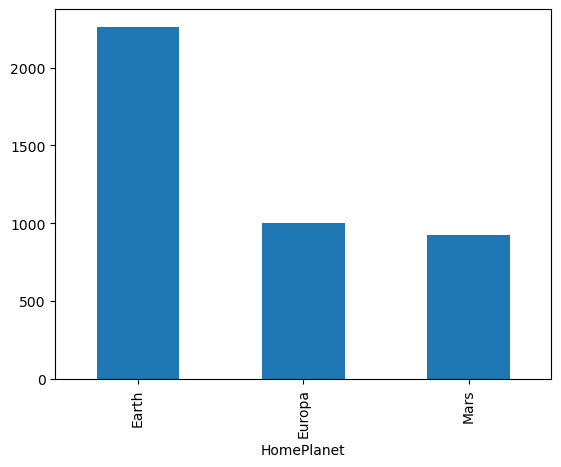

In [113]:
test['HomePlanet'].value_counts().plot(kind='bar')
plt.show()

In [114]:
test['HomePlanet'] = test['HomePlanet'].fillna('Earth')

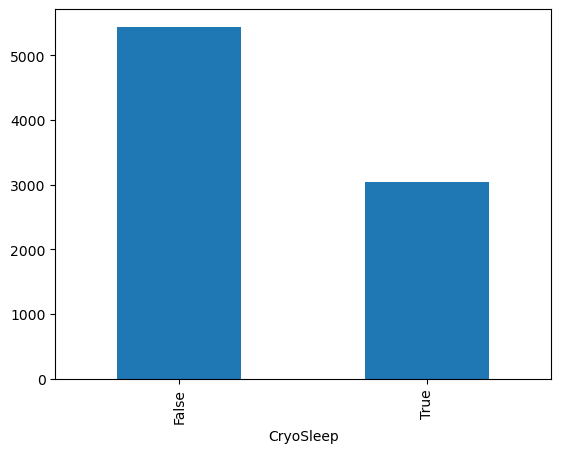

In [115]:
train['CryoSleep'].value_counts().plot(kind='bar')
plt.show()

In [116]:
train['CryoSleep'] = train['CryoSleep'].fillna('False')

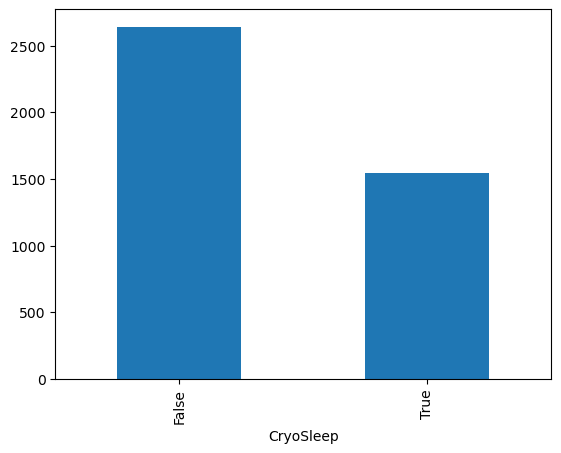

In [117]:
test['CryoSleep'].value_counts().plot(kind='bar')
plt.show()

In [118]:
test['CryoSleep'] = test['CryoSleep'].fillna('False')

In [119]:
train.isnull().sum()

HomePlanet        0
CryoSleep         0
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
CabinDeck       199
CabinNum          0
CabinSide       199
dtype: int64

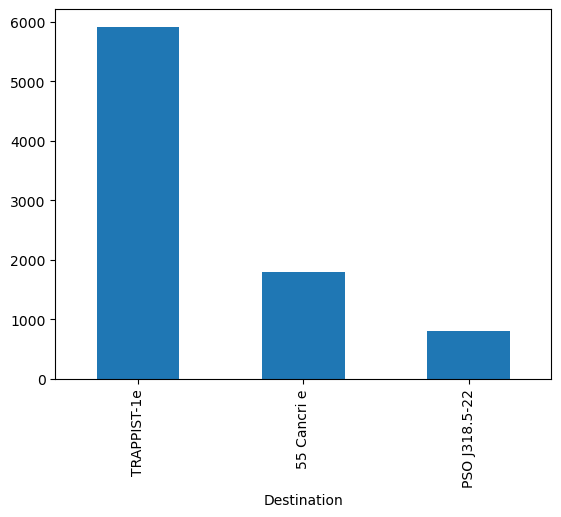

In [120]:
train['Destination'].value_counts().plot(kind='bar')
plt.show()

In [121]:
train['Destination'] = train['Destination'].fillna('TRAPPIST-1e')

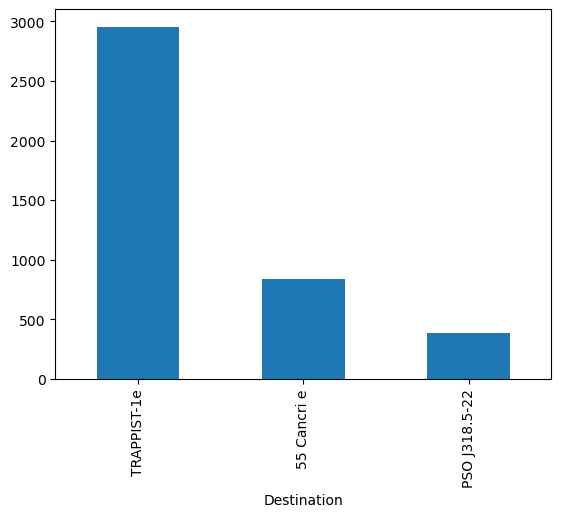

In [122]:
test['Destination'].value_counts().plot(kind='bar')
plt.show()

In [123]:
test['Destination'] = test['Destination'].fillna('TRAPPIST-1e')

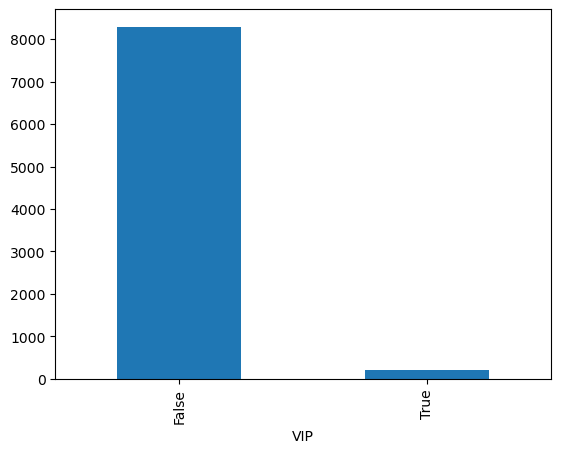

In [124]:
train['VIP'].value_counts().plot(kind='bar')
plt.show()

In [125]:
train['VIP'] = train['VIP'].fillna('False')

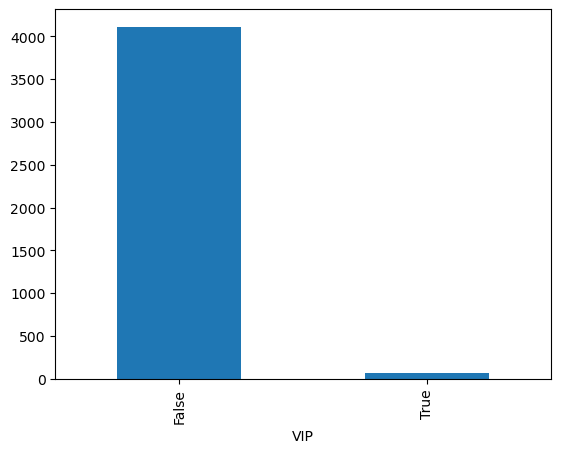

In [126]:
test['VIP'].value_counts().plot(kind='bar')
plt.show()

In [127]:
test['VIP'] = test['VIP'].fillna('False')

In [128]:
train.isnull().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
CabinDeck       199
CabinNum          0
CabinSide       199
dtype: int64

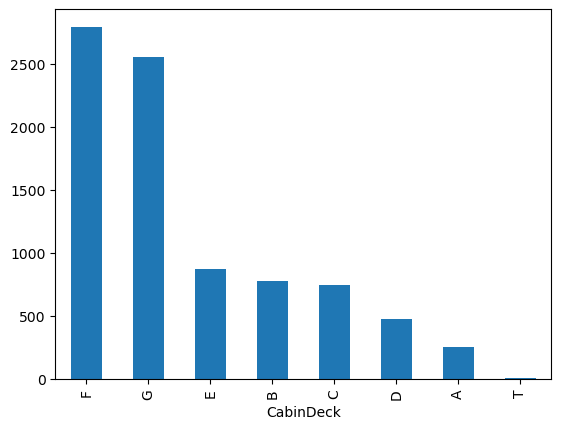

In [129]:
train['CabinDeck'].value_counts().plot(kind='bar')
plt.show()

In [132]:
unique_values = train['CabinDeck'].dropna().unique()
random_fills = np.random.choice(unique_values, size=train['CabinDeck'].isnull().sum())
train.loc[train['CabinDeck'].isnull(), 'CabinDeck'] = random_fills

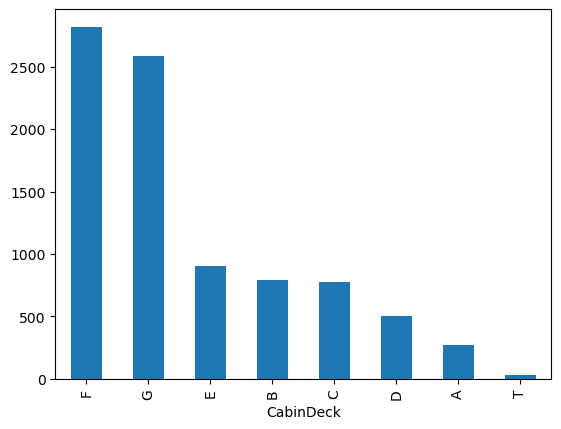

In [133]:
train['CabinDeck'].value_counts().plot(kind='bar')
plt.show()

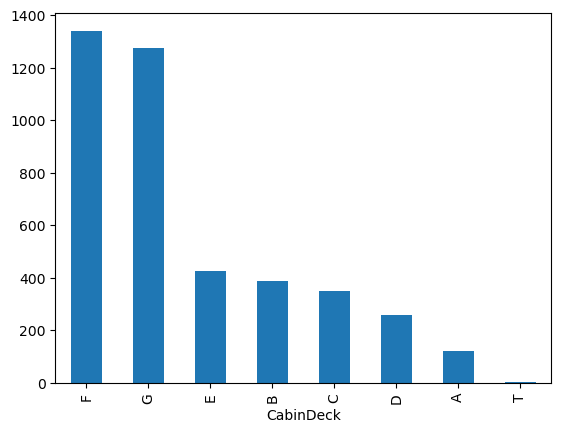

In [130]:
test['CabinDeck'].value_counts().plot(kind='bar')
plt.show()

In [136]:
unique_values = test['CabinDeck'].dropna().unique()
#unique_values
random_fills = np.random.choice(unique_values, size=test['CabinDeck'].isnull().sum())
test.loc[test['CabinDeck'].isnull(), 'CabinDeck'] = random_fills

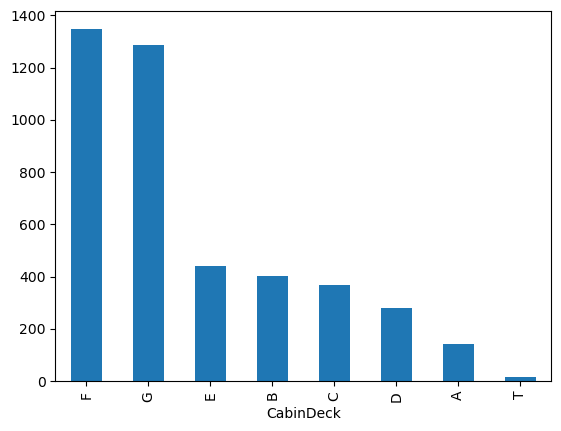

In [137]:
test['CabinDeck'].value_counts().plot(kind='bar')
plt.show()

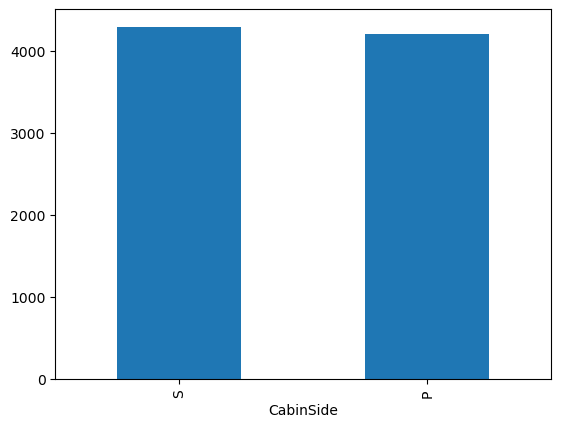

In [139]:
train['CabinSide'].value_counts().plot(kind='bar')
plt.show()

In [141]:
unique_values = train['CabinSide'].dropna().unique()
random_fills = np.random.choice(unique_values, size=train['CabinSide'].isnull().sum())
train.loc[train['CabinSide'].isnull(), 'CabinSide'] = random_fills

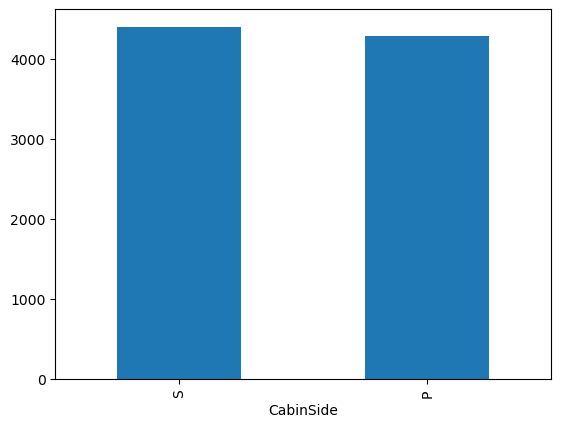

In [142]:
train['CabinSide'].value_counts().plot(kind='bar')
plt.show()

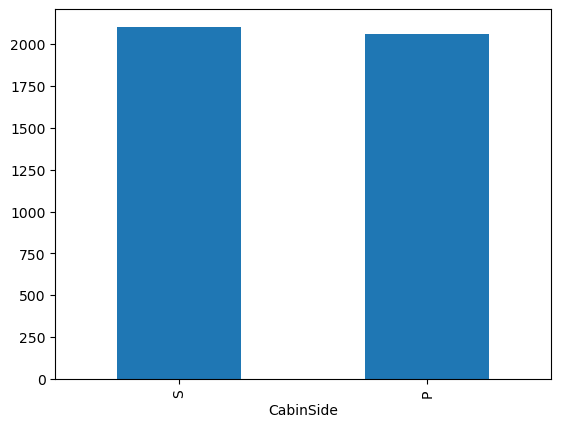

In [140]:
test['CabinSide'].value_counts().plot(kind='bar')
plt.show()

In [144]:
unique_values = test['CabinSide'].dropna().unique()
random_fills = np.random.choice(unique_values, size=test['CabinSide'].isnull().sum())
test.loc[test['CabinSide'].isnull(), 'CabinSide'] = random_fills

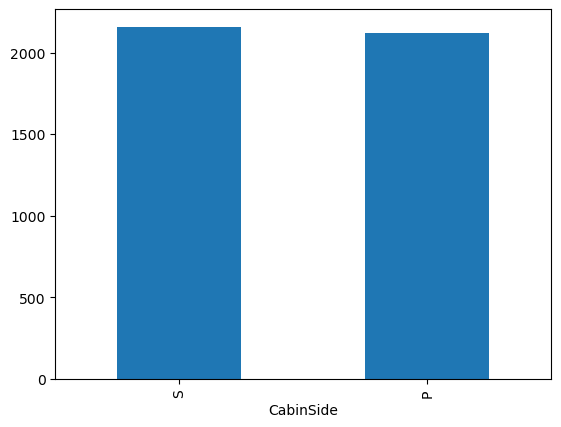

In [145]:
test['CabinSide'].value_counts().plot(kind='bar')
plt.show()

In [146]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinDeck,CabinNum,CabinSide
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0,B,0.0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1,F,0.0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,A,0.0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,A,0.0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1,F,1.0,S


In [154]:
train['VRDeck']

0          0.0
1         44.0
2         49.0
3        193.0
4          2.0
         ...  
8688      74.0
8689       0.0
8690       0.0
8691    3235.0
8692      12.0
Name: VRDeck, Length: 8693, dtype: float64

In [147]:
train.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
CabinDeck       0
CabinNum        0
CabinSide       0
dtype: int64

In [148]:
test.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
CabinDeck       0
CabinNum        0
CabinSide       0
dtype: int64

In [149]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   object 
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   object 
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   int64  
 11  CabinDeck     8693 non-null   object 
 12  CabinNum      8693 non-null   float64
 13  CabinSide     8693 non-null   object 
dtypes: float64(7), int64(1), object(6)
memory usage: 950.9+ KB


In [155]:
train = train.astype({'VIP': str, 'CryoSleep': str, 'Age': int, 'CabinNum': int, 'Spa': int, 'RoomService': int, 'FoodCourt': int, 'ShoppingMall': int, 'VRDeck': int})
test = test.astype({'VIP': str, 'CryoSleep': str, 'Age': int, 'CabinNum': int, 'Spa': int, 'RoomService': int, 'FoodCourt': int, 'ShoppingMall': int, 'VRDeck': int})

In [156]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinDeck,CabinNum,CabinSide
0,Europa,False,TRAPPIST-1e,39,False,0,0,0,0,0,0,B,0,P
1,Earth,False,TRAPPIST-1e,24,False,109,9,25,549,44,1,F,0,S
2,Europa,False,TRAPPIST-1e,58,True,43,3576,0,6715,49,0,A,0,S
3,Europa,False,TRAPPIST-1e,33,False,0,1283,371,3329,193,0,A,0,S
4,Earth,False,TRAPPIST-1e,16,False,303,70,151,565,2,1,F,1,S


In [157]:
X = train.drop(columns=['Transported'])
y = train.iloc[:, -4]

In [158]:
X

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinDeck,CabinNum,CabinSide
0,Europa,False,TRAPPIST-1e,39,False,0,0,0,0,0,B,0,P
1,Earth,False,TRAPPIST-1e,24,False,109,9,25,549,44,F,0,S
2,Europa,False,TRAPPIST-1e,58,True,43,3576,0,6715,49,A,0,S
3,Europa,False,TRAPPIST-1e,33,False,0,1283,371,3329,193,A,0,S
4,Earth,False,TRAPPIST-1e,16,False,303,70,151,565,2,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41,True,0,6819,0,1643,74,A,98,P
8689,Earth,True,PSO J318.5-22,18,False,0,0,0,0,0,G,1499,S
8690,Earth,False,TRAPPIST-1e,26,False,0,0,1872,1,0,G,1500,S
8691,Europa,False,55 Cancri e,32,False,0,1049,0,353,3235,E,608,S


In [159]:
y

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64

In [160]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [161]:
X_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinDeck,CabinNum,CabinSide
2333,Earth,False,TRAPPIST-1e,28,False,0,55,0,656,0,D,446,P
2589,Earth,False,TRAPPIST-1e,17,False,0,1195,31,0,0,F,575,P
8302,Europa,True,55 Cancri e,28,False,0,0,0,0,0,C,329,S
8177,Mars,False,TRAPPIST-1e,20,False,-17,2,289,976,0,F,1800,P
500,Europa,True,55 Cancri e,36,False,0,0,0,0,0,C,18,P


In [162]:
X_train.shape

(6954, 13)

In [163]:
X_test.shape

(1739, 13)

In [164]:
y_train.shape

(6954,)

In [165]:
y_test.shape

(1739,)

In [166]:
X_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinDeck,CabinNum,CabinSide
2333,Earth,False,TRAPPIST-1e,28,False,0,55,0,656,0,D,446,P
2589,Earth,False,TRAPPIST-1e,17,False,0,1195,31,0,0,F,575,P
8302,Europa,True,55 Cancri e,28,False,0,0,0,0,0,C,329,S
8177,Mars,False,TRAPPIST-1e,20,False,-17,2,289,976,0,F,1800,P
500,Europa,True,55 Cancri e,36,False,0,0,0,0,0,C,18,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,Earth,False,TRAPPIST-1e,18,False,14,2,144,610,0,G,988,S
5191,Mars,False,TRAPPIST-1e,50,False,690,0,30,762,428,F,1063,S
5390,Earth,False,PSO J318.5-22,22,False,158,0,476,0,26,F,1194,P
860,Mars,False,TRAPPIST-1e,34,False,379,0,1626,0,0,F,191,P


In [195]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

transformer = ColumnTransformer(transformers=[
    ('tnf1', OneHotEncoder(sparse_output=False, drop='first', dtype=int), ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'CabinDeck', 'CabinSide']),
    ('tnf2', StandardScaler(), ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CabinNum'])
], remainder='passthrough')

In [196]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.fit_transform(X_test)

In [197]:
X_train_transformed.shape

(6954, 21)

In [198]:
X_test_transformed.shape

(1739, 21)

In [199]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier,
)
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC, LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [233]:
# K-Nearest Neighbors
knc = KNeighborsClassifier(n_neighbors=5)

# Decision Tree
dtc = DecisionTreeClassifier(max_depth=5, random_state=42)

# Logistic Regression
lrc = LogisticRegression(solver='liblinear', penalty='l1', random_state=42)

# Random Forest
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# AdaBoost
abc = AdaBoostClassifier(n_estimators=50, random_state=42, algorithm='SAMME')

# Bagging
bc = BaggingClassifier(n_estimators=50, random_state=42)

# Extra Trees
etc = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Gradient Boosting
gbdt = GradientBoostingClassifier(n_estimators=100, random_state=42)

# XGBoost
xgb = XGBClassifier(n_estimators=100, random_state=42)

# Naive Bayes classifiers
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

# Support Vector Machines
svc = SVC(kernel='rbf', random_state=42)
lsvc = LinearSVC(random_state=42)

# Gaussian Process
gpc = GaussianProcessClassifier(random_state=42)

# LightGBM
lgbm = LGBMClassifier(n_estimators=100, random_state=42)

# CatBoost
cbc = CatBoostClassifier(iterations=1000, 
                           learning_rate=0.1, 
                           depth=6, 
                           eval_metric='Accuracy', 
                           random_seed=42,
                           verbose=100)

In [234]:
clfs = {
    'KNN': knc,  # K-Nearest Neighbors
    'DT': dtc,   # Decision Tree
    'LR': lrc,   # Logistic Regression
    'RF': rfc,   # Random Forest
    'AdaBoost': abc,  # AdaBoost
    'BgC': bc,   # Bagging Classifier
    'ETC': etc,  # Extra Trees Classifier
    'GBDT': gbdt,  # Gradient Boosting Decision Tree
    'XGB': xgb,  # XGBoost
    'GNB': gnb,  # Gaussian Naive Bayes
    #'MNB': mnb,  # Multinomial Naive Bayes
    'BNB': bnb,  # Bernoulli Naive Bayes
    'LinearSVC': lsvc,  # Linear Support Vector Classifier
    'LGBM': lgbm,  # LightGBM
    'CatBoost': cbc  # CatBoost
}

In [235]:
from sklearn.metrics import accuracy_score

def train_classifier(clf,X_train_transformed,y_train,X_test_transformed,y_test):
    clf.fit(X_train_transformed,y_train)
    y_pred = clf.predict(X_test_transformed)
    acc = accuracy_score(y_test, y_pred)
    return acc

In [236]:
acc_scores = []
for name,clf in clfs.items():
    current_acc = train_classifier(clf, X_train_transformed,y_train,X_test_transformed,y_test)
    print("Name: ", name)
    print("Accuracy Score: ", current_acc)
    acc_scores.append(current_acc)

Name:  KNN
Accuracy Score:  0.7625071880391029
Name:  DT
Accuracy Score:  0.772857964347326
Name:  LR
Accuracy Score:  0.78205865439908
Name:  RF
Accuracy Score:  0.7889591719378953
Name:  AdaBoost
Accuracy Score:  0.7613571017826337
Name:  BgC
Accuracy Score:  0.79700977573318
Name:  ETC
Accuracy Score:  0.7883841288096607
Name:  GBDT
Accuracy Score:  0.7952846463484762
Name:  XGB
Accuracy Score:  0.7964347326049454
Name:  GNB
Accuracy Score:  0.7389304197814837
Name:  BNB
Accuracy Score:  0.745830937320299
Name:  LinearSVC
Accuracy Score:  0.7843588269120184
[LightGBM] [Info] Number of positive: 3500, number of negative: 3454
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000610 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1637
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 21
[LightGBM] [

In [237]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy': acc_scores}).sort_values('Accuracy',ascending=False)

In [238]:
performance_df

,Algorithm,Accuracy
5,BgC,0.797010
8,XGB,0.796435
13,CatBoost,0.796435
7,GBDT,0.795285
3,RF,0.788959
6,ETC,0.788384
11,LinearSVC,0.784359
12,LGBM,0.784359
2,LR,0.782059
1,DT,0.772858


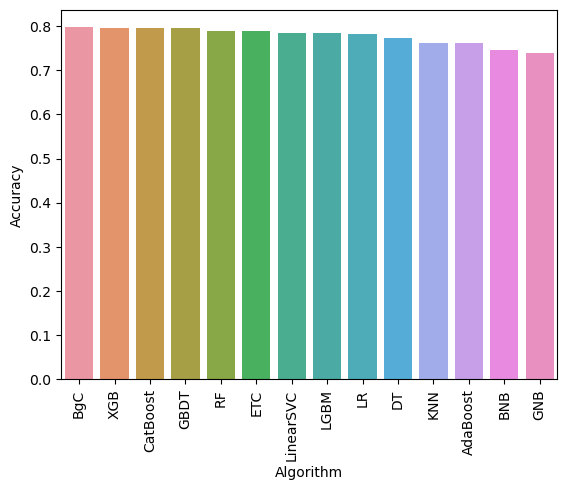

In [239]:
sns.barplot(x = performance_df['Algorithm'], y = performance_df['Accuracy'])
plt.xticks(rotation = 'vertical')
plt.show()

In [240]:
Xf_transformed = transformer.transform(test)

In [241]:
Xf_transformed

array([[ 0.        ,  0.        ,  1.        , ..., -0.24473036,
        -0.29758816, -1.1566073 ],
       [ 0.        ,  0.        ,  0.        , ...,  2.11502542,
        -0.29758816, -1.1566073 ],
       [ 1.        ,  0.        ,  1.        , ..., -0.24473036,
        -0.29758816, -1.1566073 ],
       ...,
       [ 0.        ,  1.        ,  1.        , ..., -0.24473036,
        -0.29758816,  0.68049797],
       [ 1.        ,  0.        ,  0.        , ..., -0.24473036,
         0.2083091 , -0.87623798],
       [ 0.        ,  0.        ,  1.        , ..., -0.24473036,
        -0.29758816,  0.30013679]])

In [242]:
clf1 = BaggingClassifier(n_estimators=50, random_state=42)

In [243]:
clf1.fit(X_train_transformed, y_train)

BaggingClassifier(n_estimators=50, random_state=42)

In [244]:
y_pred1 = clf1.predict(X_test_transformed)

In [245]:
y_pred1.shape

(1739,)

In [246]:
y_pred1

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [247]:
accuracy_score(y_test, y_pred1)

0.79700977573318

In [248]:
yf1=clf1.predict(Xf_transformed)

In [249]:
yf1.shape

(4277,)

In [250]:
submission1=pd.DataFrame()

In [251]:
submission1['PassengerId']=Pid
submission1['Transported']=yf1

In [252]:
def func(num):
    if num == 1:
        return True
    else:
        return False

In [253]:
submission1['Transported']=submission1['Transported'].apply(func)

In [254]:
submission1.sample(5)

,PassengerId,Transported
2011,4323_03,False
1231,2611_01,False
131,0279_01,False
3651,7953_01,False
3264,7141_01,True


In [255]:
submission1.to_csv('submission1.csv', index=False)